In [1]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline  

In [2]:
data = pd.read_csv('/home/daria/Documents/ml/HeartDiseaseData.csv', index_col = 0)

In [3]:
data = data.drop(['ID'], axis = 1)

In [4]:
data.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
1,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
2,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
3,29,male,atypical angina,140.0,NaN,False,normal,170.0,no,0.0,0,Hungary
4,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
5,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0,Hungary


In [5]:
data.dtypes

Age           int64
Sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
num           int64
Place        object
dtype: object

In [6]:
data.describe()

,Age,trestbps,chol,thalach,oldpeak,num
count,457.000000,424.000000,431.000000,424.000000,421.000000,457.000000
mean,50.962801,131.488208,200.048724,134.910377,0.622090,0.459519
std,9.219588,18.829454,113.463794,24.251177,0.922115,0.498905
min,28.000000,80.000000,0.000000,69.000000,-2.600000,0.000000
25%,45.000000,120.000000,171.000000,118.000000,0.000000,0.000000
50%,52.000000,130.000000,220.000000,135.000000,0.000000,0.000000
75%,57.000000,140.000000,269.500000,150.000000,1.000000,1.000000
max,75.000000,200.000000,603.000000,190.000000,5.000000,1.000000


In [7]:
data.isnull().sum()

Age          0
Sex          0
cp           0
trestbps    33
chol        26
fbs         54
restecg      2
thalach     33
exang       33
oldpeak     36
num          0
Place        0
dtype: int64

In [8]:
data.describe(include=[object])

,Sex,cp,fbs,restecg,exang,Place
count,457,457,403,455,424,457
unique,2,4,2,3,2,3
top,male,asymptomatic,False,normal,no,Hungary
freq,364,227,347,320,272,294


In [9]:
data_describe = data.describe(include=[object])

In [10]:
data = data.fillna({'trestbps': data.Age.median(),
                   'chol': data.chol.median(),
                   'thalach': data.thalach.median(),
                   'oldpeak': data.oldpeak.median(),
                   'restecg': data_describe.restecg['top'],
                   'fbs': data_describe.fbs['top'],
                   'exang': data_describe.exang['top']})

In [11]:
data.isnull().sum()

Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
num         0
Place       0
dtype: int64

In [12]:
data = data.rename(columns = {'restecg_having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV': 'restecg_having_ST_T', 
                              'restecg_showing probable or definite left ventricular hypertrophy by Estes criteria': 'restecg_left_ventricular_hypertrophy'})

In [13]:
data = pd.get_dummies(data)

In [14]:
data.head()

,Age,trestbps,chol,fbs,thalach,oldpeak,num,Sex_female,Sex_male,cp_asymptomatic,...,cp_non-anginal pain,cp_typical angina,restecg_having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV,restecg_normal,restecg_showing probable or definite left ventricular hypertrophy by Estes criteria,exang_no,exang_yes,Place_Hungary,Place_Switzerland,Place_VA
1,28,130.0,132.0,False,185.0,0.0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
2,29,120.0,243.0,False,160.0,0.0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
3,29,140.0,220.0,False,170.0,0.0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
4,30,170.0,237.0,False,170.0,0.0,0,1,0,0,...,0,1,1,0,0,1,0,1,0,0
5,31,100.0,219.0,False,150.0,0.0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0


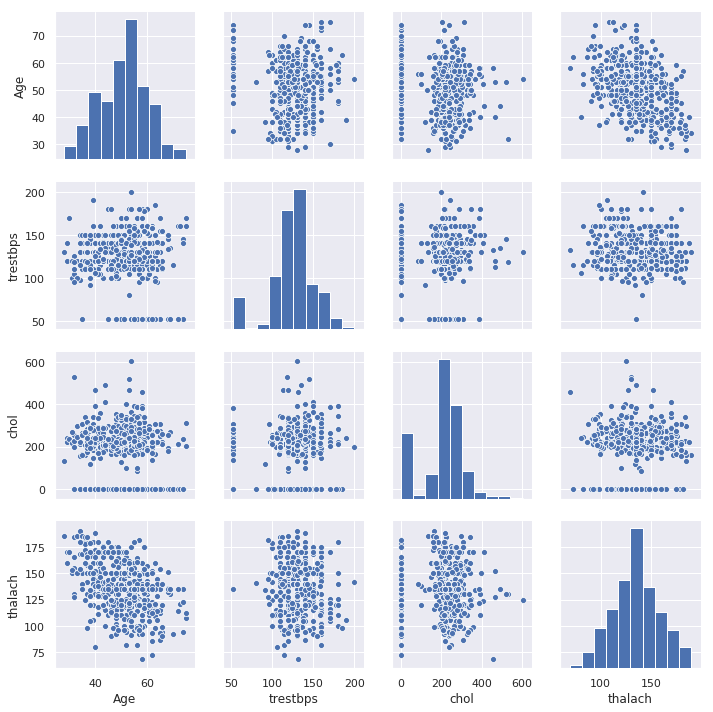

In [15]:
data_numeric = data.select_dtypes(include=['int', 'float64']).drop(['oldpeak', 'num'], 1)
sns.pairplot(data_numeric)

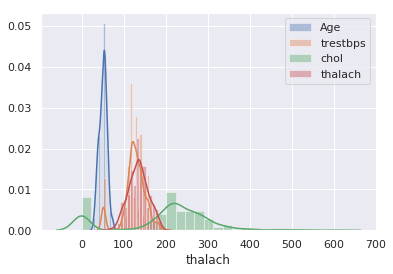

In [16]:
for column in data_numeric:
    sns.distplot(data[str(column)], label = column)
plt.legend()

In [17]:
X = data.drop('num', axis=1)
y = data.num

In [18]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
clf.score(X, y)

1.0

In [20]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [21]:
from IPython.display import HTML
style = "<style>svg{width:20% !important;height:20% !important;}</style>"
HTML(style)

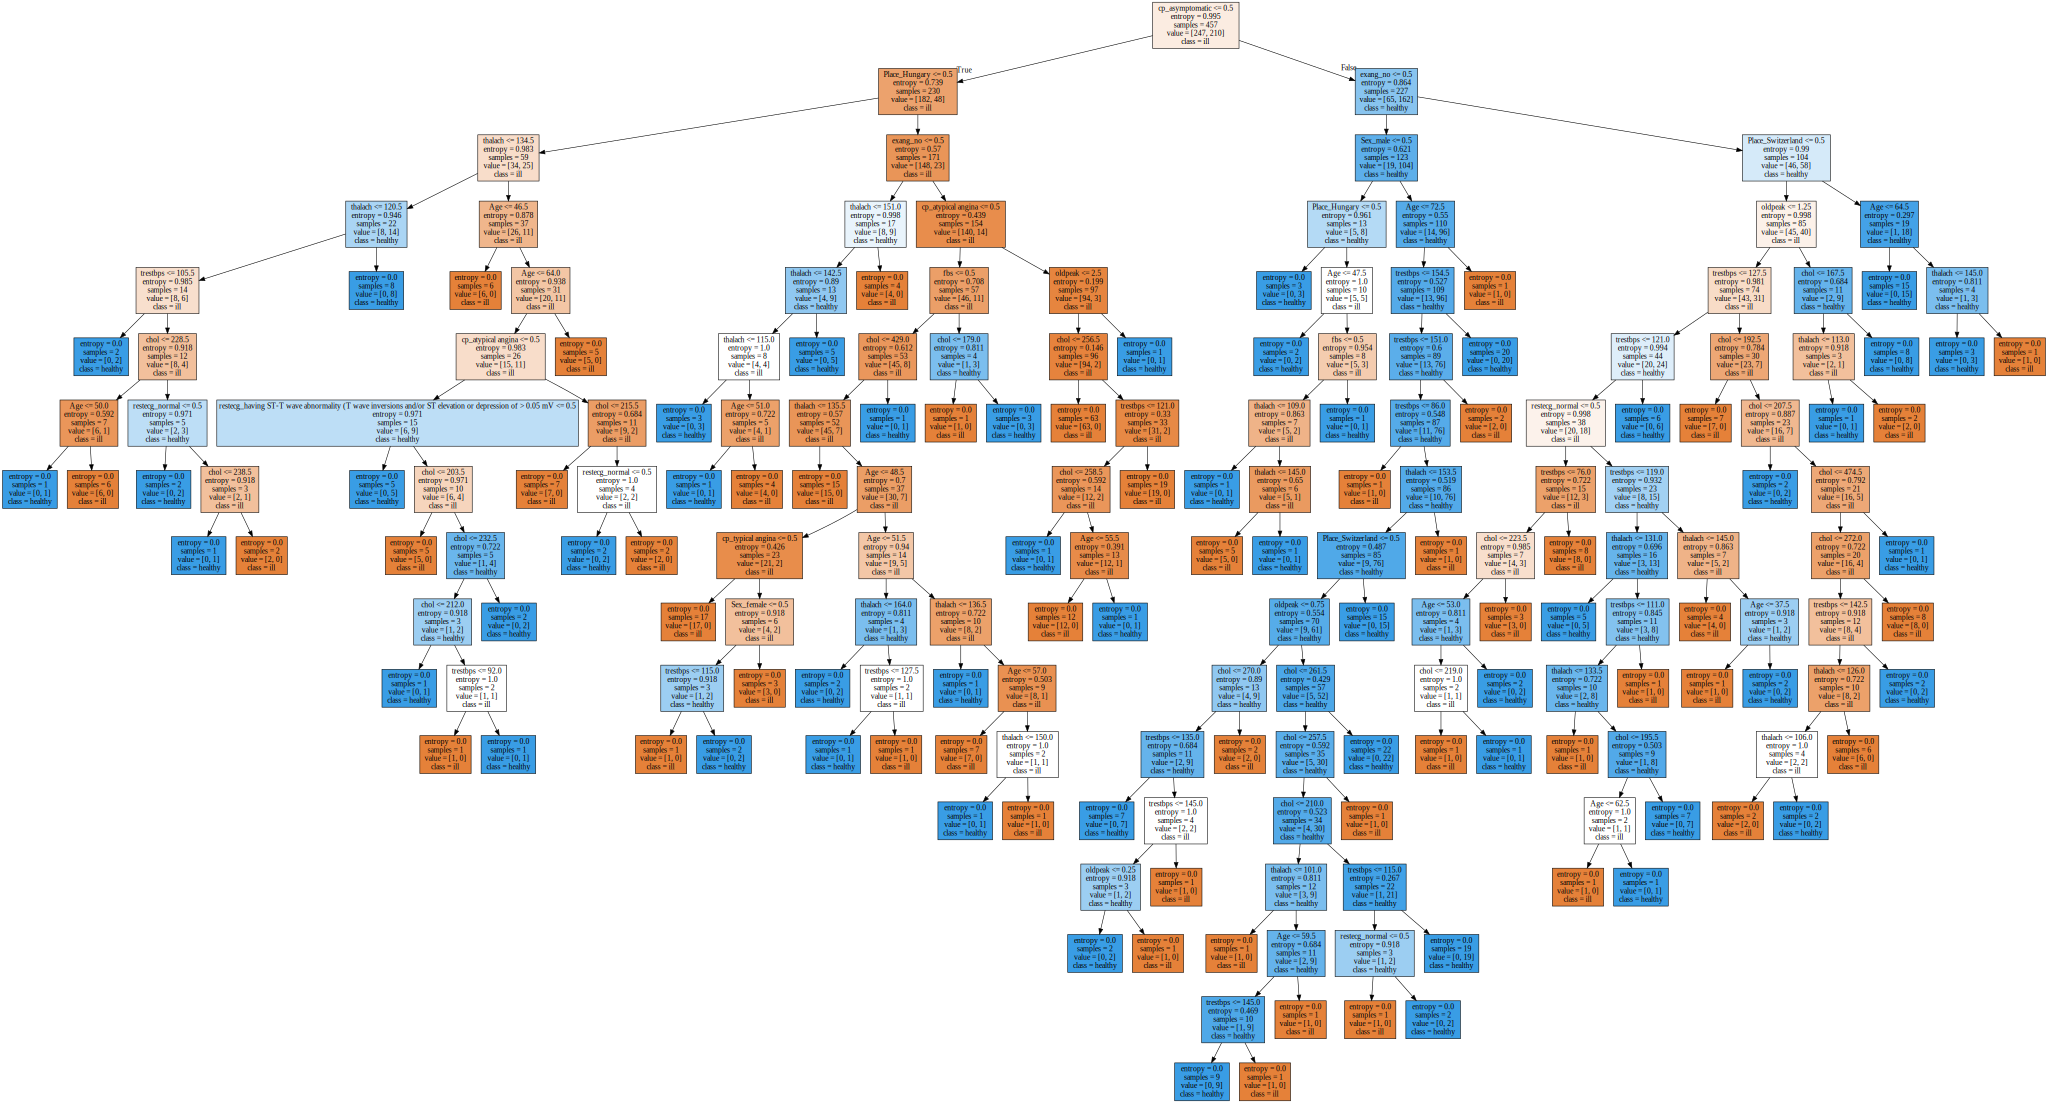

In [22]:
style = "<style>svg{width:20% !important;height:20% !important;}</style>"
HTML(style)
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=list(X), class_names=['ill', 'healthy'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

In [24]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
clf.score(X_train, y_train)

1.0

In [26]:
clf.score(X_test, y_test)

0.6754966887417219

In [27]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [28]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
clf.score(X_train, y_train)

0.7875816993464052

In [30]:
clf.score(X_test, y_test)

0.7615894039735099

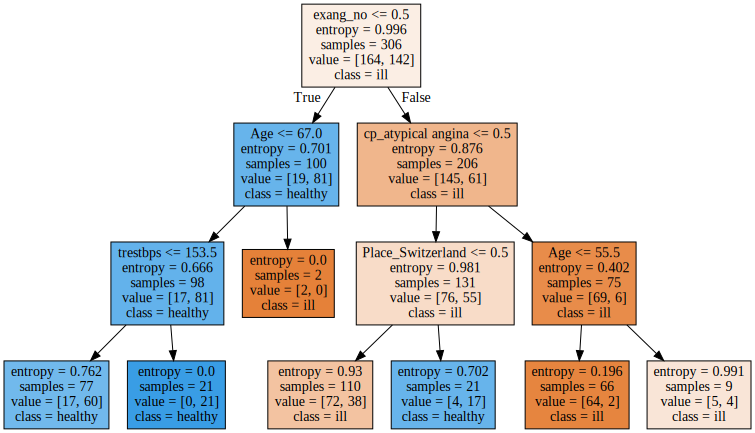

In [31]:
style = "<style>svg{width:20% !important;height:20% !important;}</style>"
HTML(style)
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=list(X), class_names=['ill', 'healthy'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

In [32]:
max_depth_values = range(1, 50)
classifier_score_data = pd.DataFrame()

In [34]:
from sklearn.model_selection import cross_val_score
for max_dept in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_dept)
    clf.fit(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    train_score = clf.score(X_train, y_train)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'precision').mean()
    
    classifier_score_data = classifier_score_data \
        .append(pd.DataFrame({'test_score': [test_score], 
                              'train_score': [train_score], 
                              'max_dept': [max_dept], 
                              'mean_cross_val_score': [mean_cross_val_score]}))

In [35]:
classifier_score_data.head()

,test_score,train_score,max_dept,mean_cross_val_score
0,0.721854,0.738562,1,0.743165
0,0.715232,0.745098,2,0.726519
0,0.761589,0.787582,3,0.781308
0,0.741722,0.833333,4,0.735353
0,0.728477,0.852941,5,0.734912


In [36]:
classifier_score_data = pd.melt(classifier_score_data,id_vars=['max_dept'], var_name='set_type', value_name='score')

In [37]:
classifier_score_data.head()

,max_dept,set_type,score
0,1,test_score,0.721854
1,2,test_score,0.715232
2,3,test_score,0.761589
3,4,test_score,0.741722
4,5,test_score,0.728477


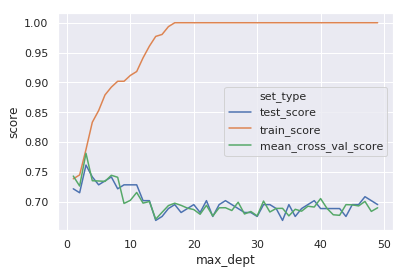

In [38]:
ax = sns.lineplot(x="max_dept", y="score",
                   hue="set_type", data=classifier_score_data)

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)

In [42]:
cross_val_scores.mean()

0.7549197955226512